Using VGG16 for Classification of 'Hungry' and 'Not Hungry' fishes

In [ ]:
cd '/content/'

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/research_work

/content/drive/MyDrive/research_work


In [ ]:
!unzip '/content/drive/MyDrive/research_work/first_dataset_output.zip' -d '/content/drive/MyDrive/research_work/extracted_dataset'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Hungry/2083.jpg  
  inflating: /content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Hungry/2084.jpg  
  inflating: /content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Hungry/2087.jpg  
  inflating: /content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Hungry/2088.jpg  
  inflating: /content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Hungry/2089.jpg  
  inflating: /content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Hungry/209.jpg  
  inflating: /content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Hungry/2091.jpg  
  inflating: /content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Hungry/2092.jpg  
  inflating: /content/drive/MyDrive/research_w

In [ ]:
import os, sys

# Open a file
path = "/content/drive/MyDrive/research_work/extracted_dataset"
dirs = os.listdir( path )

# This would print all the files and directories
for file in dirs:
   print(file)

first_dataset_output
.ipynb_checkpoints


In [ ]:
import os, sys

# Open a file
path = "/content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/test/Not Hungry"
print(len(os.listdir( path )))

#theres total 5506 hungry and 462 not hungry



93


In [ ]:
!pip install tensorflow-addons==0.16.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 37.5 MB/s 


In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow
#import tensorflow as tf
#import tensorflow_addons as tfa

In [ ]:
!nvidia-smi

Sat Oct 29 20:37:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
train_path="/content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train"
test_path="/content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [ ]:
print(class_names)
print(class_names_test)

['Not Hungry', 'Hungry']
['Not Hungry', 'Hungry']


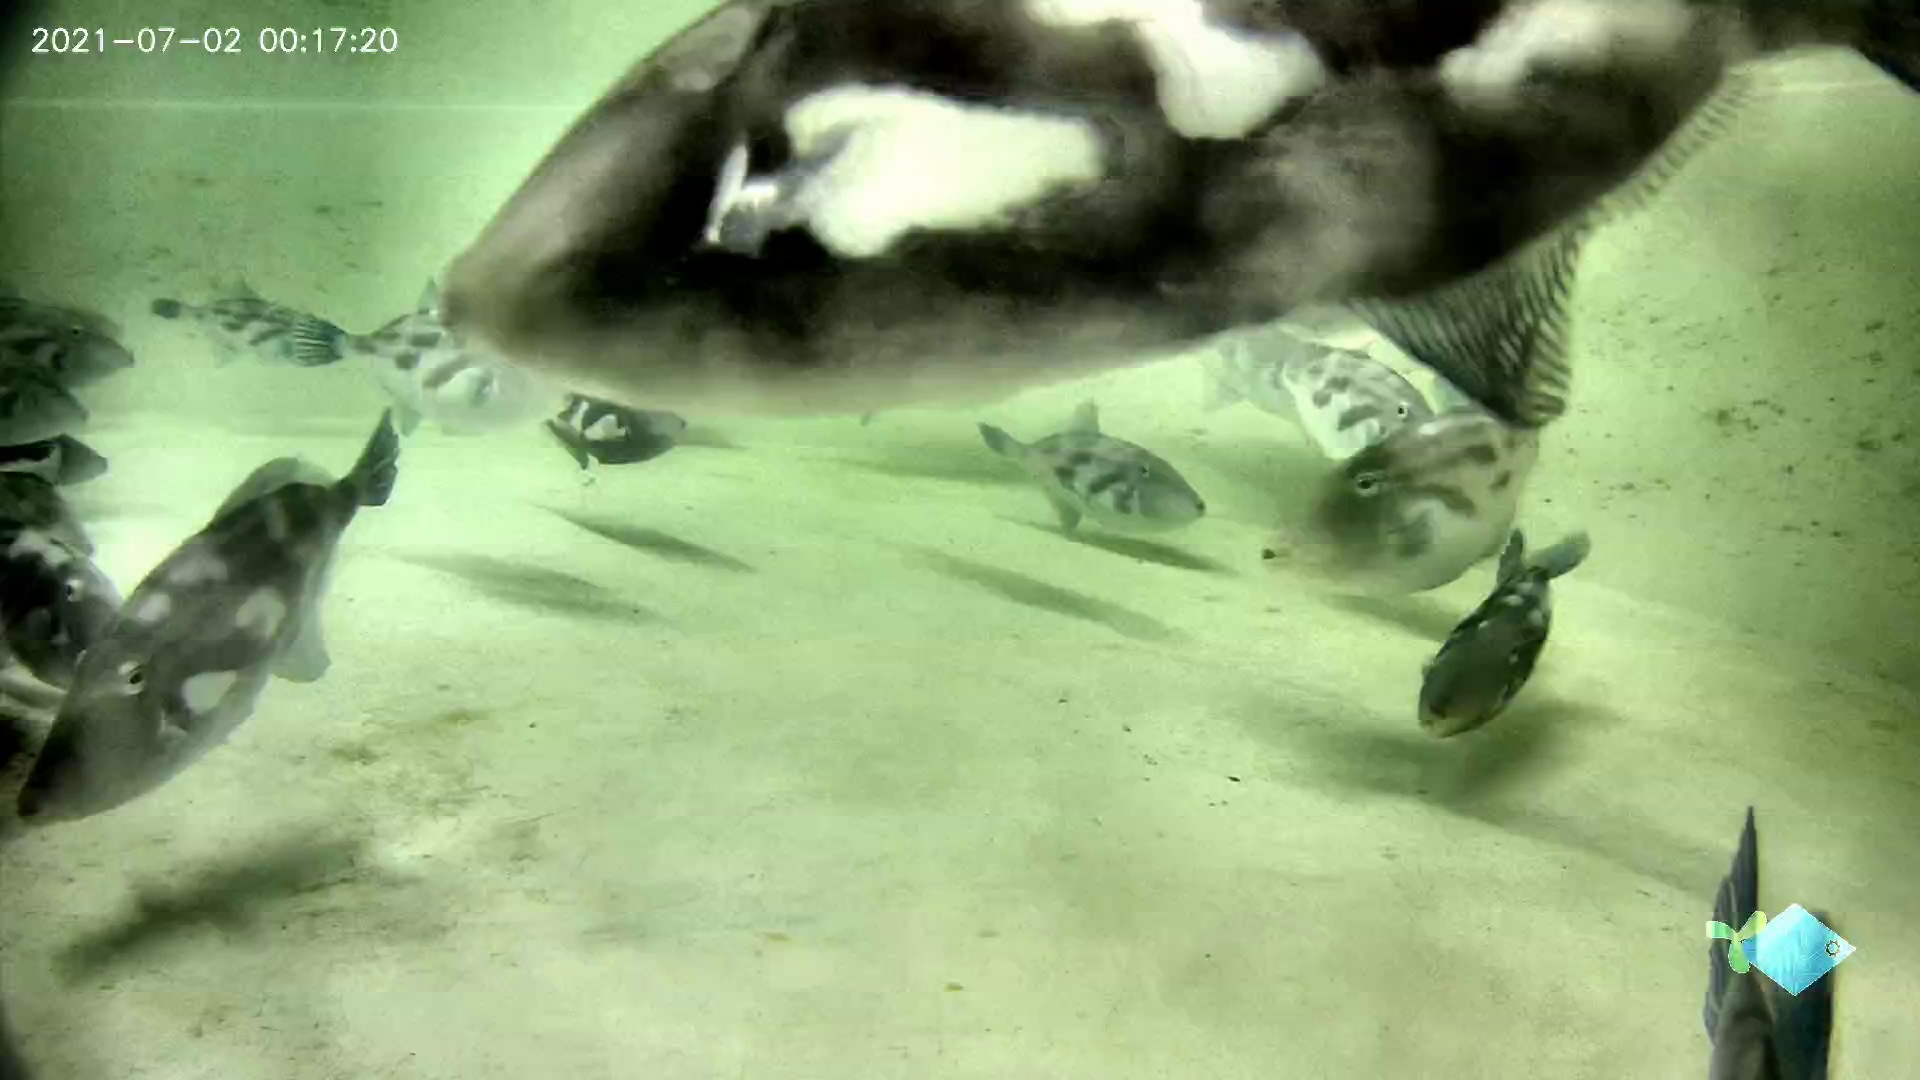

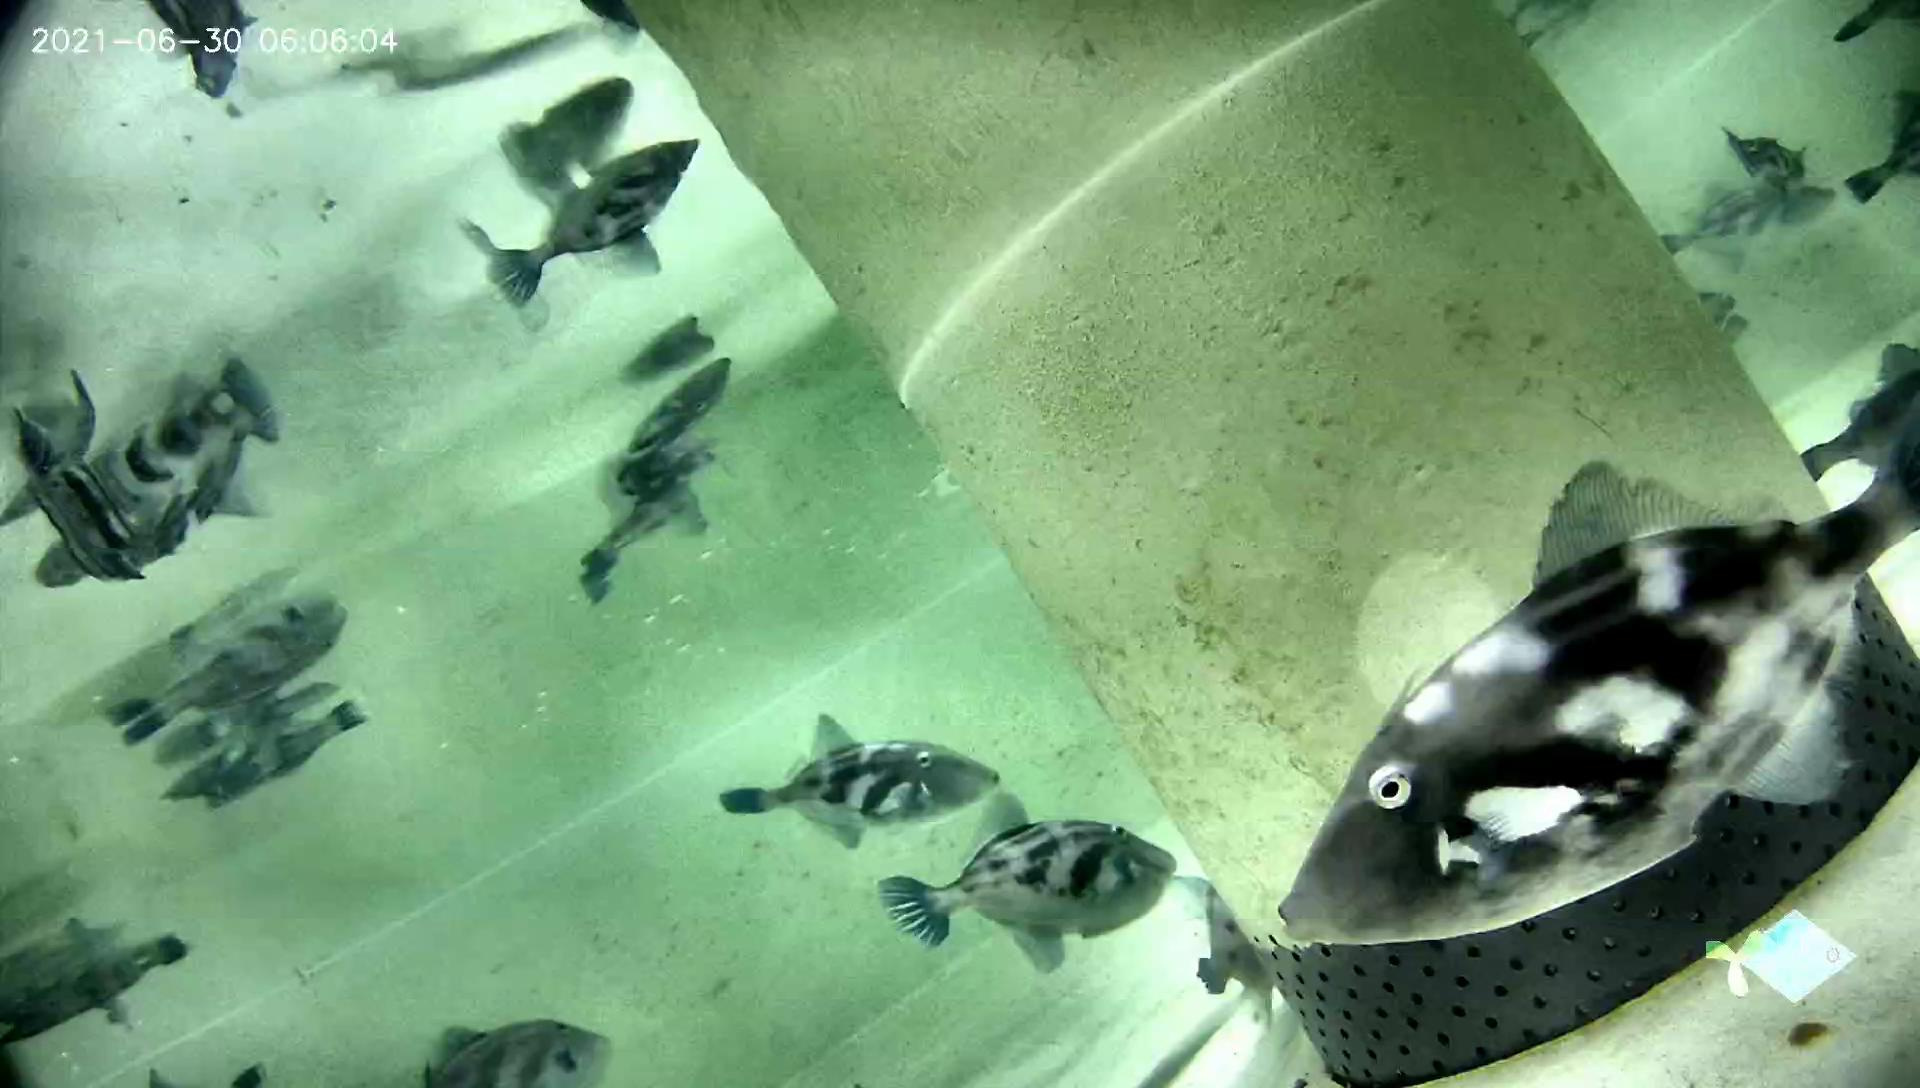

In [ ]:
#Sample datasets images
image_Hungry=cv2.imread("/content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/test/Hungry/5.jpg")
cv2_imshow(image_Hungry)
image_NotHungry=cv2.imread("/content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train/Not Hungry/scene00301.jpg")
cv2_imshow(image_NotHungry)

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 4773 images belonging to 2 classes.
Found 1195 images belonging to 2 classes.


In [ ]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu", name= "input"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(units=4096,activation="relu", name='fc_1'))
    model.add(Dropout(0.5, name='dropout_1'))
    model.add(Dense(units=4096,activation="relu", name='fc_2'))
    model.add(Dropout(0.5, name='dropout_4'))
    model.add(Dense(units=1, activation="sigmoid", name="output"))

    ##units are 1 because we are using binary activation
    #no dropout layers
    return model

In [ ]:
model=VGG16()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 224, 224, 64)      1792      
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
vgg16  = Model(inputs=input, outputs=output)

NameError: ignored

In [ ]:
Vgg16 = Model(inputs=model.input, outputs=model.output)

In [ ]:
for layer in Vgg16.layers:
    layer.trainable = True

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e8085a490> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2ef922bb50> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f2e7ed839d0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e7ed899d0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e7c792a10> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f2e7c799c90> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e7c79dd50> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e7c7a81d0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e7c7adb90> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f2e7c7b2f50> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e7c7a8050> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e7c7c25d0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2e7c7b85d0> True
<keras.layers.pooling.max_pool

In [ ]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"
                              #tf.keras.metrics.Precision(),
                              #tf.keras.metrics.Recall(),
                              ])

                              #while using precsion, recall, the val acc val loss will come at the end of epoch

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint('/content/drive/MyDrive/research_work/best_model3.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=5,verbose=1,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
  3/150 [..............................] - ETA: 36:22 - loss: 0.2926 - accuracy: 0.8750

KeyboardInterrupt: ignored

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.0009834511438384652, 1.0]

In [ ]:
#in keras, precission, recall, f1 score need to be given atr model.compile

In [ ]:
from sklearn.metrics import precision_score , recall_score

y_val_pred=model.predict(x_val)

print(precision_score(y_val,y_val_pred,average=None))


NameError: ignored

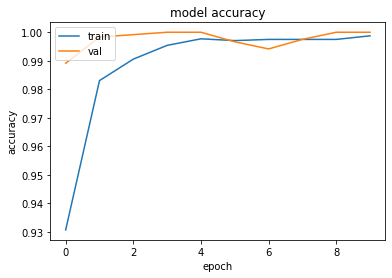

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

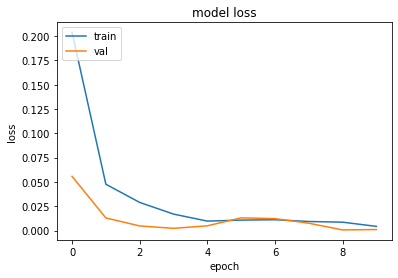

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#serializing the model
model_json = model.to_json()
with open("/content/drive/MyDrive/research_work/model2.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
#performing infrence

from keras.models import model_from_json

In [ ]:
def predict_(image_path):
    #Load the Model from Json File
    json_file = open('/content/drive/MyDrive/research_work/model2.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/drive/MyDrive/research_work/best_model2.h5")
    #Compile the model
    opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    cv2_imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    if preds==0:
        print("Predicted Label:not hungry")
    else:
        print("Predicted Label: hungry")

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


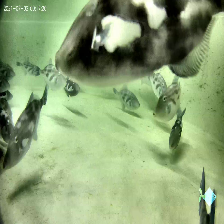

1/1 [==============================] - 1s 1s/step
Predicted Label: hungry


In [ ]:
predict_("/content/drive/MyDrive/research_work/2.jpg")

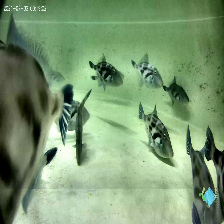

1/1 [==============================] - 0s 137ms/step
Predicted Label: hungry


In [ ]:
predict_("/content/drive/MyDrive/research_work/1883.jpg")

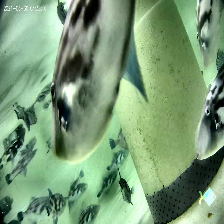

1/1 [==============================] - 0s 132ms/step
Predicted Label: hungry


In [ ]:
predict_("/content/drive/MyDrive/research_work/scene05001 (2).jpg")

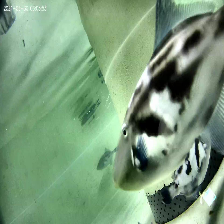

1/1 [==============================] - 0s 136ms/step
Predicted Label: hungry


In [ ]:
predict_("/content/drive/MyDrive/research_work/extracted_dataset/first_dataset_output/test/Not Hungry/scene00101.jpg")